## Multivariate Linear Regression

In [57]:
# Imports
import numpy as np
import pandas as pd

from multivariate_linear_regression import *

### Preprocessing

In [58]:
def normalize(data):
    num_columns = data[0, ...].size
    num_rows = data[..., 0].size
    column_ranges = np.array([])
    column_minimums = np.array([])

    for i in range(num_columns - 1):
        column_range = np.ptp(data[:, i])
        column_minimum = np.min(data[:, i])
        data[:, i] = (data[:, i] - column_minimum) / column_range

        column_ranges = np.append(column_ranges, [column_range])
        column_minimums = np.append(column_minimums, [column_minimum])
    
    return (data, column_minimums, column_ranges)

##### Importing from washington_housing.csv

In [59]:
# Importing Data and Removing Irrelevant Columns
data = np.loadtxt("washington_housing_prices.csv", delimiter=",", dtype=str)
data = np.delete(data, [0, 13, 14, 15, 16, 17], axis = 1)

# Moving Output Column to the End
data = np.roll(data, -1, axis = 1)

column_headings = data[0, :]
data = data[1:, :]

# data = np.loadtxt("dumb_test_data.csv", delimiter=",", dtype=str, skiprows = 1)

column_headings = column_headings.astype(str)
data = data.astype(float)

# Saving the Number of Columns and Rows of the Data
num_columns = data[0, ...].size
num_rows = data[..., 0].size

## Graphs

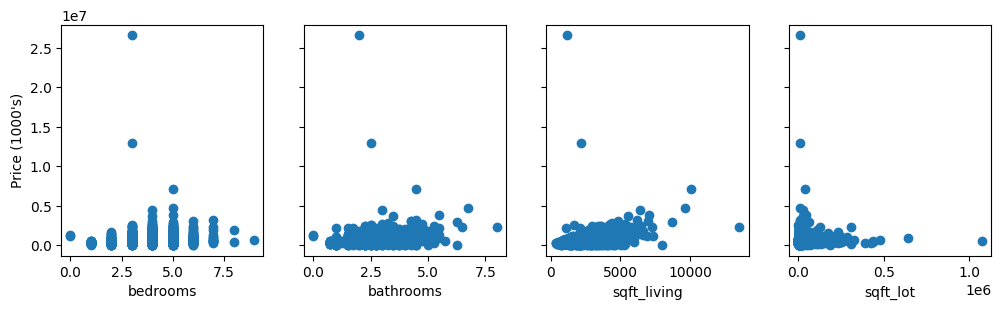

In [60]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)



for i in range(len(ax)):
    ax[i].scatter(data[:,i],data[:, num_columns - 1])
    ax[i].set_xlabel(column_headings[i])

ax[0].set_ylabel("Price (1000's)")
plt.show()

In [61]:
# Normalizing Data (Using Feature Scaling)
# We both normalize the data as well 

(data, column_minimums, column_ranges) = normalize(data)

# Creating Training Set and Test Set
training_data = data[0:int(num_rows/2), :]
test_data = data[int(num_rows/2):data.size, :]

# Output for Understanding
print("Number of Total Columns (Input Columns + 1 Output Price Column): ")
print(num_columns)
print("\n")

print("Number of Total Rows (Training + Test) (Number of Data Points): ")
print(num_rows)
print("\n")

print("Training Data: ")
print(training_data)
print("\n")

print("Test Data: ")
print(test_data)
print("\n")

Number of Total Columns (Input Columns + 1 Output Price Column): 
12


Number of Total Rows (Training + Test) (Number of Data Points): 
4600


Training Data: 
[[3.33333333e-01 1.87500000e-01 7.36522399e-02 ... 0.00000000e+00
  4.82456140e-01 3.13000000e+05]
 [5.55555556e-01 3.12500000e-01 2.49050873e-01 ... 5.80912863e-02
  1.84210526e-01 2.38400000e+06]
 [3.33333333e-01 2.50000000e-01 1.18451025e-01 ... 0.00000000e+00
  5.78947368e-01 3.42000000e+05]
 ...
 [4.44444444e-01 3.43750000e-01 1.41989370e-01 ... 0.00000000e+00
  6.66666667e-01 5.80379000e+05]
 [4.44444444e-01 3.12500000e-01 2.35383447e-01 ... 0.00000000e+00
  8.33333333e-01 8.75000000e+05]
 [3.33333333e-01 3.12500000e-01 2.27790433e-01 ... 3.52697095e-02
  4.47368421e-01 5.15000000e+05]]


Test Data: 
[[4.44444444e-01 3.12500000e-01 1.83750949e-01 ... 0.00000000e+00
  7.80701754e-01 5.99000000e+05]
 [3.33333333e-01 3.12500000e-01 1.13895216e-01 ... 0.00000000e+00
  9.21052632e-01 2.85000000e+05]
 [3.33333333e-01 2.18750000e-

## Multivariable Linear Regression Custom Implementation (from multivariable_linear_regression.py)

In [62]:
# Parameters w (w_1 ... w_n) and b
start_w = np.zeros(num_columns - 1)
start_b = 0

print("Number of w parameters: ")
print(start_w.size)

Number of w parameters: 
11


In [63]:
(w, b, tracking_cost) = gradient_descent(training_data, start_w, start_b, 0.01, 20000)

print("w parameter values: ")
print(w)
print("\n")

print("b parameter value: ")
print(b)

w parameter values: 
[  53821.4950103   575384.38954434  915781.46945482  -55007.78237913
  200552.25273254  540496.5007889   298257.30721431  116592.27214923
 1091485.84201655  455147.29064116 -307216.70610827]


b parameter value: 
110243.26609460816


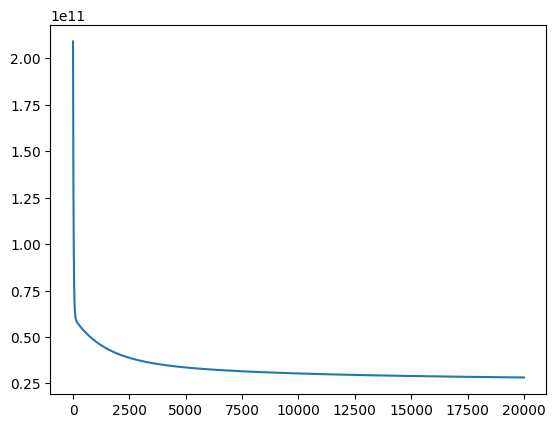

In [64]:
import matplotlib.pyplot as plt 

plt.plot(tracking_cost)

### Error on Test Data

In [65]:
# Error on Test Data Calculated with Custom Implementation of root_mean_squared_error
# Should match the error found by the sklearn.metrics mean_squared_error function below.

error_test_data = root_mean_squared_error(test_data, w, b)
print("Cost with Test Data: " + str(error_test_data))

Cost with Test Data: 669466.0706092934


In [66]:
# Error on Test Data Calculated with sklearn.metrics mean_squared_error function
# Should match the error found by the custom implementation of root_mean_squared_error above.

# Imports
from sklearn.metrics import mean_squared_error

# Getting List of House Price Predictions Using test_data Parameters and the Computed 
# Linear Regression Model
test_data_estimated_prices = np.array([])

for sample in test_data:
    test_data_estimated_prices = np.append(test_data_estimated_prices, np.dot(sample[0:-1], w) + b)

# Running the Root Mean Squared Error Function from sklearn on the actual house prices 
# from the test_data and the predicted house prices.
linear_rmse = mean_squared_error(test_data[:, -1], test_data_estimated_prices, squared = False)

linear_rmse

669466.0706092936

## Multivariable Linear Regression Library Implementation (from sklearn)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# sklearn Linear Regression model 1: Uses LinearRegression() model
# This model doesn't use gradient descent but instead uses an analytical method 
# to directly solve for the line of best fit. 

# linear_regression = LinearRegression()
# linear_regression.fit(training_data[:, 0:-1], training_data[:, -1])

# sklearn Linear Regression model 2: uses SGDRegressor() model
# This model uses stochastic gradient descent, and thus is directly comparable 
# to the custom implementation of multivariable linear regression included 
# within this file.

linear_regression = SGDRegressor(
    max_iter=10000, alpha=0.01, random_state=42, learning_rate = "constant")
linear_regression.fit(training_data[:, 0:-1], training_data[:, -1])

SGDRegressor(alpha=0.01, learning_rate='constant', max_iter=10000,
             random_state=42)

In [68]:
w = linear_regression.coef_
b = linear_regression.intercept_

print("w parameter values: ")
print(w)
print("\n")

print("b parameter value: ")
print(b)
print("\n")

w parameter values: 
[ 150250.43368841  414061.7996346   572683.28365013  -13840.36113934
  214178.79215507  299364.56343526  331264.56497588  101731.62738987
  665480.92715409  316657.93863054 -191149.62583149]


b parameter value: 
[178782.81149502]




### Error on Test Data

In [69]:
# Error on Test Data Calculated with Custom Implementation of root_mean_squared_error
# Should match the error found by the sklearn.metrics mean_squared_error function below.

error_test_data = root_mean_squared_error(test_data, w, b)
print("Cost with Test Data: " + str(error_test_data))

Cost with Test Data: [671277.54185893]


In [70]:
from sklearn.metrics import mean_squared_error

test_data_estimated_prices = linear_regression.predict(test_data[:, 0:-1])

linear_rmse = mean_squared_error(test_data[:, -1], test_data_estimated_prices, squared = False)

linear_rmse

671277.5418589298

## Miscellaneous